# Math - Linear Algebra
Linear Algebra is the branch of mathematics that studies vector spaces and linear transformations between vector spaces, such as rotating a shape, scaling it up or down, translating it, etc.

# Vector
## Definition
A vector is a quantity defined by a magnitude and a direction. A vector can be represented by an array of numbers called *scalars*. Each scalar corresponds to the magnitude of the vector with regards to each dimension.

A list of N numbers may also represent the coordinates of a point in an N-dimensional space, so it is quite frequent represent vectors as simple point instead of arrows.

## Purpose
Vectors have many purposes in Machine Learning, most notably to represent observations and predictions.

## Vectors in python
A vector can be represented in many ways, for example a regular python list of numbers.

In [1]:
[11.0, 5.5, 3.4, 6.7]

[11.0, 5.5, 3.4, 6.7]

In [2]:
# it is better to use NumPy's array, 
# because we will do a lot of scientific calculations
import numpy as np

video = np.array([11.0, 5.5, 3.4, 6.7])
video

array([11. ,  5.5,  3.4,  6.7])

In [3]:
# the size of a vector
video.size

4

In [4]:
# accessing an element
video[2]

3.4

## Plotting vectors

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

### 2D vectors

In [6]:
u = np.array([1, 2])
v = np.array([5, 3])

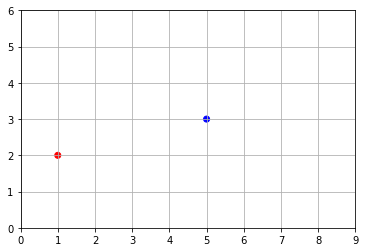

In [7]:
# plotting graph
x_coords, y_coords = zip(u, v)
plt.scatter(x_coords, y_coords, color=["r", "b"])
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

In [8]:
# vectors can also be represented as arrows
def plot_vector2d(vector2d, origin=[0,0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
                    head_width=0.2, head_length=0.3, length_includes_head=True,
                    **options)

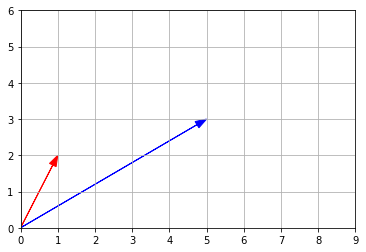

In [9]:
# draw the vectors
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

### 3D vectors

In [10]:
a = np.array([2, 4, 6])
b = np.array([1, 3, 5])

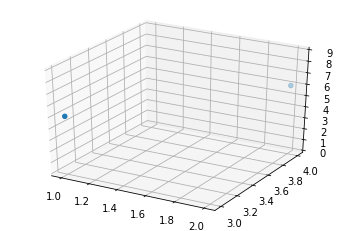

In [11]:
from mpl_toolkits.mplot3d import Axes3D

subplot3d = plt.subplot(111, projection="3d")
x_coords, y_coords, z_coords = zip(a,b)
subplot3d.scatter(x_coords, y_coords, z_coords)
subplot3d.set_zlim3d([0,9])
plt.show()

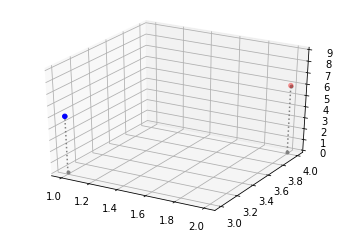

In [12]:
# add vertical lines to visualize better
def plot_vectors3d(ax, vectors3d, z0, **options):
    for v in vectors3d:
        x, y, z = v
        ax.plot([x,x], [y,y], [z0,z], color="gray", linestyle="dotted", marker=".")
    x_coords, y_coords, z_coords = zip(*vectors3d)
    ax.scatter(x_coords, y_coords, z_coords, **options)
    
subplot3d = plt.subplot(111, projection="3d")
subplot3d.set_zlim([0,9])
plot_vectors3d(subplot3d, [a,b], 0, color=("r","b"))
plt.show()

## Norm
The norm of a vector $\textbf{u}$, noted $\left \Vert \textbf{u} \right \|$, is a measure of the length (a.k.a. the magnitude) of $\textbf{u}$.

The norm that we will discuss is the Euclidian norm, defined:

$\left \Vert \textbf{u} \right \| = \sqrt{\sum_{i}{\textbf{u}_i}^2}$

We could implement it, by recalling $\sqrt x = x^{\frac{1}{2}}$

In [13]:
def vector_norm(vector):
    squares = [element**2 for element in vector]
    return sum(squares)**0.5

print("||", u, "||")
vector_norm(u)

|| [1 2] ||


2.23606797749979

In [14]:
# we can use Numpy's linalg (Linear Algebra)
import numpy.linalg as LA
LA.norm(u)

2.23606797749979

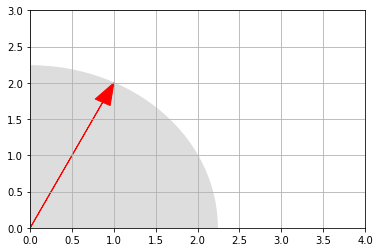

In [15]:
# let's plotting the vector u
radius = LA.norm(u)
plt.gca().add_artist(plt.Circle((0,0), radius, color="#DDDDDD"))
plot_vector2d(u, color="red")
plt.axis([0, 4, 0, 3])
plt.grid()
plt.show()

# The result of the plot, looks right

## Addition
Vectors of **same size** can be added together. Addition is performed *elementwise*

In [16]:
print(" ", u)
print("+", v)
print("-"*10)
u + v

  [1 2]
+ [5 3]
----------


array([6, 5])

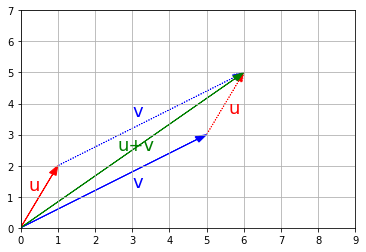

In [17]:
# let's plot the addition graph
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plot_vector2d(v, origin=u, color="b", linestyle="dotted")
plot_vector2d(u, origin=v, color="r", linestyle="dotted")
plot_vector2d(u+v, color="g")
plt.axis([0, 9, 0, 7])
plt.text(0.2, 1.2, "u", color="r", fontsize=18)
plt.text(5.6, 3.7, "u", color="r", fontsize=18)
plt.text(3, 1.3, "v", color="b", fontsize=18)
plt.text(3, 3.6, "v", color="b", fontsize=18)
plt.text(2.6, 2.5, "u+v", color="g", fontsize=18)
plt.grid()
plt.show()

Vector addition is **commutative**, meaning that $\textbf{u} + \textbf{v} = \textbf{v} + \textbf{u}$

Vector addition is also **associative**, meaning that $\textbf{u} + (\textbf{v} + \textbf{w}) = (\textbf{u} + \textbf{v}) + \textbf{w}$

If we have a shape defined by a number points (vectors), and we add a vector $\textbf{v}$ to all of these points, then the whole shape gets shifted by $\textbf{v}$. This is called **geometric translation**

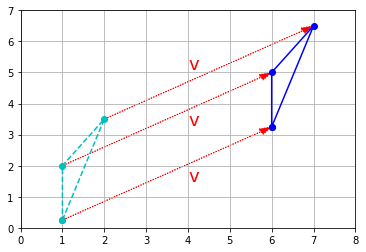

In [18]:
t1 = np.array([1, 0.25])
t2 = np.array([2, 3.5])
t3 = np.array([1, 2])

x_coords, y_coords = zip(t1, t2, t3, t1)
plt.plot(x_coords, y_coords, "c--", x_coords, y_coords, "co")

plot_vector2d(v, t1, color="r", linestyle=":")
plot_vector2d(v, t2, color="r", linestyle=":")
plot_vector2d(v, t3, color="r", linestyle=":")

t1b = t1 + v
t2b = t2 + v
t3b = t3 + v

x_coords_b, y_coords_b = zip(t1b, t2b, t3b, t1b)
plt.plot(x_coords_b, y_coords_b, "b-", x_coords_b, y_coords_b, "bo")

plt.text(4, 5.1, "v", color="r", fontsize=18)
plt.text(4, 3.3, "v", color="r", fontsize=18)
plt.text(4, 1.5, "v", color="r", fontsize=18)

plt.axis([0, 8, 0, 7])
plt.grid()
plt.show()

## Multiplication by a scalar
Vectors can be multiplied by scalars.

In [19]:
print("2.1 *", u, "=")

2.1 * u

2.1 * [1 2] =


array([2.1, 4.2])

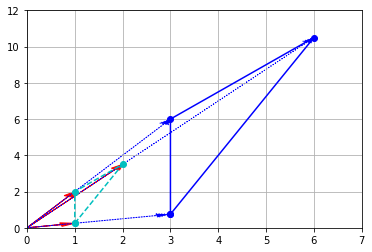

In [20]:
# scalar multiplications results in changing the scale of the figure, hence the name scalar

k = 3 # scalar
t1c = k * t1
t2c = k * t2
t3c = k * t3

plt.plot(x_coords, y_coords, "c--", x_coords, y_coords, "co")

plot_vector2d(t1, color="r")
plot_vector2d(t2, color="r")
plot_vector2d(t3, color="r")

x_coords_c, y_coords_c = zip(t1c, t2c, t3c, t1c)
plt.plot(x_coords_c, y_coords_c, "b-", x_coords_c, y_coords_c, "bo")

plot_vector2d(k * t1, color="b", linestyle=":")
plot_vector2d(k * t2, color="b", linestyle=":")
plot_vector2d(k * t3, color="b", linestyle=":")

plt.axis([0, 7, 0, 12])
plt.grid()
plt.show()

Dividing a vector by a scalar is equivalent to multiplying by its inverse:

$\dfrac{\textbf{u}}{\lambda} = \dfrac{1}{\lambda} \times \textbf{u}$

Scalar multiplication is **commutative**: $\lambda \times \textbf{u} = \textbf{u} \times \lambda$.

It is also **associative**: $\lambda_1 \times (\lambda_2 \times \textbf{u}) = (\lambda_1 \times \lambda_2) \times \textbf{u}$.

Finally, it is **distributive** over addition of vectors: $\lambda \times (\textbf{u} + \textbf{v}) = \lambda \times \textbf{u} + \lambda \times \textbf{v}$.

## Zero, unit and normalized vectors
- A **zero-vector** is a vector full of 0s
- A **unit vector** is a vector with a norm equal to 1
- The **normalized vector** of a non-null vector $\textbf{u}$, noted $\hat{\textbf{u}}$, is the unit vector that points in the same direction as $\textbf{u}$. It is equal to: $\hat{\textbf{u}} = \dfrac{\textbf{u}}{\left \Vert \textbf{u} \right \|}$

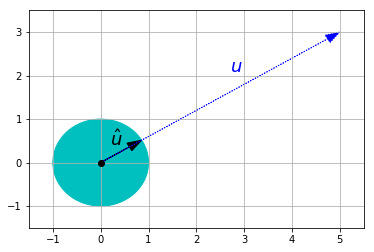

In [21]:
plt.gca().add_artist(plt.Circle((0,0),1,color='c'))
plt.plot(0, 0, "ko")
plot_vector2d(v / LA.norm(v), color="k")
plot_vector2d(v, color="b", linestyle=":")
plt.text(0.2, 0.4, "$\hat{u}$", color="k", fontsize=18)
plt.text(2.7, 2.1, "$u$", color="b", fontsize=18)
plt.axis([-1.5, 5.5, -1.5, 3.5])
plt.grid()
plt.show()

## Dot product
The dot product (*scalar product or inner product*) of two vectors $\textbf{u}$ and $\textbf{v}$ is noted $\textbf{u} \cdot \textbf{v}$ or $(\textbf{u}|\textbf{v})$, and it is defined as:

$\textbf{u} \cdot \textbf{v} = \left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v} \right \| \times cos(\theta)$

where $\theta$ is the angle between $\textbf{u}$ and $\textbf{v}$

Another way is:

$\textbf{u} \cdot \textbf{v} = \sum_i{\textbf{u}_i \times \textbf{v}_i}$

In [22]:
def dot_product(v1, v2):
    return sum(v1i * v2i for v1i, v2i in zip(v1,v2))

dot_product(u, v)

11

In [23]:
# Numpy's dot product
np.dot(u, v)

11

In [24]:
# Numpy's array dot
u.dot(v)

11

### Main properties
- The dot product is **commutative**: $\textbf{u} \cdot \textbf{v} = \textbf{v} \cdot \textbf{u}$.
- The dot product is only defined between two vectors, not between a scalar and a vector. This means that we cannot chain dot products: for example, the expression $\textbf{u} \cdot \textbf{v} \cdot \textbf{w}$ is not defined since $\textbf{u} \cdot \textbf{v}$ is a scalar and $\textbf{w}$ is a vector.
- The dot product is **NOT associative**: $(\textbf{u} \cdot \textbf{v}) \cdot \textbf{w} ≠ \textbf{u} \cdot (\textbf{v} \cdot \textbf{w})$
- The dot product is **associative with regards to scalar multiplication**: $\lambda \times (\textbf{u} \cdot \textbf{v}) = (\lambda \times \textbf{u}) \cdot \textbf{v} = \textbf{u} \cdot (\lambda \times \textbf{v})$
- The dot product is **distributive** over addition of vectors: $\textbf{u} \cdot (\textbf{v} + \textbf{w}) = \textbf{u} \cdot \textbf{v} + \textbf{u} \cdot \textbf{w}$.

### Calculating the angle between vectors
Based on the dot product definition, we can deduce the following formula:

$\theta = \arccos{\left ( \dfrac{\textbf{u} \cdot \textbf{v}}{\left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v} \right \|} \right ) }$

**Note:**
- If $\textbf{u} \cdot \textbf{v} = 0$, it follows that $\theta = \dfrac{π}{2}$. It means that they are **orthogonal**.

In [25]:
# calculate the angle between u and v (in radians)
def vector_angle(u, v):
    cos_theta = u.dot(v) / LA.norm(u) / LA.norm(v)
    return np.arccos(np.clip(cos_theta, -1, 1))

theta = vector_angle(u, v)
print("Angle =", theta, "radians")
print("      =", theta * 180 / np.pi, "degrees")

Angle = 0.5667292175235066 radians
      = 32.471192290848506 degrees


**Note:** due to small floating point errors, cos_theta may be very slightly outside of the $[-1, 1]$ interval, which would make arccos fail. This is why we clipped the value within the range, using NumPy's clip function.

### Projecting a point onto an axis
he projection of vector $\textbf{v}$ onto $\textbf{u}$'s axis is given by this formula:

$\textbf{proj}_{\textbf{u}}{\textbf{v}} = \dfrac{\textbf{u} \cdot \textbf{v}}{\left \Vert \textbf{u} \right \| ^2} \times \textbf{u}$

Which equivalent to:

$\textbf{proj}_{\textbf{u}}{\textbf{v}} = (\textbf{v} \cdot \hat{\textbf{u}}) \times \hat{\textbf{u}}$

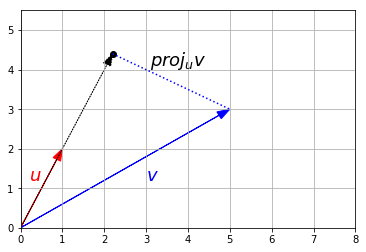

In [26]:
u_normalized = u / LA.norm(u)
proj = v.dot(u_normalized) * u_normalized

plot_vector2d(u, color="r")
plot_vector2d(v, color="b")

plot_vector2d(proj, color="k", linestyle=":")
plt.plot(proj[0], proj[1], "ko")

plt.plot([proj[0], v[0]], [proj[1], v[1]], "b:")

plt.text(3.1, 4.1, "$proj_u v$", color="k", fontsize=18)
plt.text(3, 1.2, "$v$", color="b", fontsize=18)
plt.text(0.2, 1.2, "$u$", color="r", fontsize=18)

plt.axis([0, 8, 0, 5.5])
plt.grid()
plt.show()

# Matrices
A matrix is a rectangular array of scalars arranged in rows and columns, for example:

$$\begin{bmatrix} 10 & 20 & 30 \\ 40 & 50 & 60 \end{bmatrix}$$

Matrices are great at representing and performing linear transformations such rotations, translations, and scaling.

## Matrices in python

In [27]:
# with list
[
    [10, 20, 30],
    [40, 50, 60],
]

[[10, 20, 30], [40, 50, 60]]

In [28]:
# using numpy
# by convention matrices generally have uppercase names, such as A
A = np.array([
    [10,20,30],
    [40,50,60],
])
A

array([[10, 20, 30],
       [40, 50, 60]])

## Size
It is defined by its number of rows and numbers of columns: $rows \times columns$.

In [29]:
# get matrix's size
A.shape

(2, 3)

In [30]:
# size: the number of elements in array
A.size

6

## Element indexing
The number located in the $i^{th}$ row, and $j^{th}$ column of a matrix $X$, noted $X_{i,j}$ or $X_{ij}$.

In [31]:
A[1,2]  # 2nd row, 3rd column (remember python's index start from 0)

60

In [32]:
# 1st row vector (as a 1D array)
A[1, :]

array([40, 50, 60])

In [33]:
# 2nd column vector (as a 1D array)
A[:, 1]

array([20, 50])

Note: the result is actually a one-dimensional NumPy array. If we need to represent a row vector as a one-row matrix, we need to use a slice.

In [34]:
# rows 2 to 3: this return row 2 as a one-row matrix
A[1:2, :]

array([[40, 50, 60]])

In [35]:
# columns 3 to 4: this return column 3 as one-row matrix
A[:, 2:3]

array([[30],
       [60]])

## Square, triangular, diagonal and identity matrices

A **square matrix** is a matrix that has the same number of rows and columns:

$$\begin{bmatrix}
  4 & 9 & 2 \\
  3 & 5 & 7 \\
  8 & 1 & 6
\end{bmatrix}$$

An **upper triangular matrix** is a special kind of square matrix where all the elements *below* the main diagonal (top-left to bottom right) are zero:

$$\begin{bmatrix}
  4 & 9 & 2 \\
  0 & 5 & 7 \\
  0 & 0 & 6
\end{bmatrix}$$

A **lower triangular matrix** is a square matrix where all elements *above* the main diagonal are zero:

$$\begin{bmatrix}
  4 & 0 & 0 \\
  3 & 5 & 0 \\
  8 & 1 & 6
\end{bmatrix}$$

A **triangular matrix** is one that either lower triangular or upper triangular.

A **diagonal matrix** is both upper and lower triangular.

$$\begin{bmatrix}
  4 & 0 & 0 \\
  0 & 5 & 0 \\
  0 & 0 & 6
\end{bmatrix}$$

In [36]:
# diagonal
np.diag([4, 5, 6])

array([[4, 0, 0],
       [0, 5, 0],
       [0, 0, 6]])

In [37]:
# we can get the diagonal values
D = np.array([
        [4, 6, 8],
        [10, 12, 14],
        [16, 18, 20],
    ])
np.diag(D)

array([ 4, 12, 20])

The **identity matrix** of size $n$, noted $I_n$, is a diagonal matrix of size  $n \times n$ with $1$'s in the main diagonal.

$\textbf{I}_{\textbf{3}} = \begin{bmatrix}
  1 & 0 & 0 \\
  0 & 1 & 0 \\
  0 & 0 & 1
\end{bmatrix} $

In [38]:
# Numpy's eye function returns the identity of matrix
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## Adding matrices
if two matrices $Q$ and $R$ have the same size $m \times n$, they can be added together. $S_{i,j} = Q_{i,j} + R_{i,j}$

$S =
\begin{bmatrix}
  Q_{11} + R_{11} & Q_{12} + R_{12} & Q_{13} + R_{13} & \cdots & Q_{1n} + R_{1n} \\
  Q_{21} + R_{21} & Q_{22} + R_{22} & Q_{23} + R_{23} & \cdots & Q_{2n} + R_{2n}  \\
  Q_{31} + R_{31} & Q_{32} + R_{32} & Q_{33} + R_{33} & \cdots & Q_{3n} + R_{3n}  \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  Q_{m1} + R_{m1} & Q_{m2} + R_{m2} & Q_{m3} + R_{m3} & \cdots & Q_{mn} + R_{mn}  \\
\end{bmatrix}$

In [39]:
# let's try with Numpy
B = np.array([[1,2,3], [4,5,6]])
B

array([[1, 2, 3],
       [4, 5, 6]])

In [40]:
A

array([[10, 20, 30],
       [40, 50, 60]])

In [41]:
A + B

array([[11, 22, 33],
       [44, 55, 66]])

**Addition is *commutative***, meaning $A + B = B + A$:

In [42]:
B + A

array([[11, 22, 33],
       [44, 55, 66]])

**It is also *associative***, meaning that $A + (B + C) = (A + B) + C$:

In [43]:
C = np.array([[100,200,300], [400,500,600]])

A + (B + C)

array([[111, 222, 333],
       [444, 555, 666]])

In [44]:
(A + B) + C

array([[111, 222, 333],
       [444, 555, 666]])

## Scalar multiplication
a A matrix $M$ can be multiplied by a scalar $\lambda$.

$\lambda M =
\begin{bmatrix}
  \lambda \times M_{11} & \lambda \times M_{12} & \lambda \times M_{13} & \cdots & \lambda \times M_{1n} \\
  \lambda \times M_{21} & \lambda \times M_{22} & \lambda \times M_{23} & \cdots & \lambda \times M_{2n} \\
  \lambda \times M_{31} & \lambda \times M_{32} & \lambda \times M_{33} & \cdots & \lambda \times M_{3n} \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  \lambda \times M_{m1} & \lambda \times M_{m2} & \lambda \times M_{m3} & \cdots & \lambda \times M_{mn} \\
\end{bmatrix}$

In [45]:
# in Numpy using * operator
2 * A

array([[ 20,  40,  60],
       [ 80, 100, 120]])

Scalar multiplication is **commutative & associative**, meaning that $\alpha (\beta M) = (\alpha \times \beta) M$, where $\alpha$ and $\beta$ are scalars.

In [46]:
2 * (3 * A)

array([[ 60, 120, 180],
       [240, 300, 360]])

In [47]:
(2 * 3) * A

array([[ 60, 120, 180],
       [240, 300, 360]])

It is also **distributive over addition** of matrices, meaning that $\lambda (Q + R) = \lambda Q + \lambda R$

In [48]:
2 * (A + B)

array([[ 22,  44,  66],
       [ 88, 110, 132]])

In [49]:
2 * A + 2 * B

array([[ 22,  44,  66],
       [ 88, 110, 132]])

## Matrix multiplication

A matrix $Q$ of size $m \times n$ can be multiplied by a matrix $R$ of size $n \times q$. Noted $QR$.

The result $P$ is an $m \times q$ matrix where each element computed as a sum of products:
$P_{i,j} = \sum_{k=1}^n{Q_{i,k} \times R_{k,j}}$

We may notice that each element $P_{i,j}$ is the dot product of the row vector $Q_{i,*}$ and the column vector $R_{*,j}$:

$P_{i,j} = Q_{i,*} \cdot R_{*,j}$

So we can rewrite $P$ more concisely as:

$P =
\begin{bmatrix}
Q_{1,*} \cdot R_{*,1} & Q_{1,*} \cdot R_{*,2} & \cdots & Q_{1,*} \cdot R_{*,q} \\
Q_{2,*} \cdot R_{*,1} & Q_{2,*} \cdot R_{*,2} & \cdots & Q_{2,*} \cdot R_{*,q} \\
\vdots & \vdots & \ddots & \vdots \\
Q_{m,*} \cdot R_{*,1} & Q_{m,*} \cdot R_{*,2} & \cdots & Q_{m,*} \cdot R_{*,q}
\end{bmatrix}$

In [50]:
A

array([[10, 20, 30],
       [40, 50, 60]])

In [51]:
D = np.array([
        [ 2,  3,  5,  7],
        [11, 13, 17, 19],
        [21, 29, 31, 37],
    ])
E = A.dot(D)
E

array([[ 870, 1160, 1320, 1560],
       [1890, 2510, 2910, 3450]])

**Matrix multiplication is NOT commutative**: in general $QR ≠ RQ$

In [52]:
try:
    D.dot(A)
except ValueError as e:
    print("ValueError:", e)

ValueError: shapes (3,4) and (2,3) not aligned: 4 (dim 1) != 2 (dim 0)


In [53]:
F = np.array([
        [5,2],
        [4,1],
        [9,3],
    ])
A.dot(F)

array([[400, 130],
       [940, 310]])

In [54]:
F.dot(A)

array([[130, 200, 270],
       [ 80, 130, 180],
       [210, 330, 450]])

**Matrix multiplication is associative**, meaning that $Q(RS) = (QR)S$

In [55]:
G = np.array([
        [8,  7,  4,  2,  5],
        [2,  5,  1,  0,  5],
        [9, 11, 17, 21,  0],
        [0,  1,  0,  1,  2],
    ])
A.dot(D).dot(G)    # (AB)G

array([[21160, 27970, 27080, 31020, 13270],
       [46330, 61240, 59540, 68340, 28900]])

In [56]:
A.dot(D.dot(G))    # A(BG)

array([[21160, 27970, 27080, 31020, 13270],
       [46330, 61240, 59540, 68340, 28900]])

It is also **distributive over addition** of matrices, meaning that $(Q + R)S = QS + RS$

In [57]:
(A + B).dot(D)

array([[ 957, 1276, 1452, 1716],
       [2079, 2761, 3201, 3795]])

In [58]:
A.dot(D) + B.dot(D)

array([[ 957, 1276, 1452, 1716],
       [2079, 2761, 3201, 3795]])

The product of a matrix $M$ by the identity matrix (of matching size) results in the same matrix $M$. More formally, if $M$ is an $m \times n$ matrix, then:

$M I_n = I_m M = M$

This is generally written more concisely (since the size of the identity matrices is unambiguous given the context):

$MI = IM = M$

In [59]:
A.dot(np.eye(3))

array([[10., 20., 30.],
       [40., 50., 60.]])

In [60]:
np.eye(2).dot(A)

array([[10., 20., 30.],
       [40., 50., 60.]])

**Caution**: * operator performs elementwise multiplication *NOT* a matrix multiplication.

In [61]:
A * B    # NOT a matrix multiplication

array([[ 10,  40,  90],
       [160, 250, 360]])

**The @ infix operator**

A @ D equivalent with <code>A.dot(D)</code>. And equivalent to <code>A.__matmul__(D)</code> which is implemented by NumPy as <code>np.matmul(A, D)</code>.

In [62]:
A @ D

array([[ 870, 1160, 1320, 1560],
       [1890, 2510, 2910, 3450]])

In [63]:
A.dot(D)

array([[ 870, 1160, 1320, 1560],
       [1890, 2510, 2910, 3450]])

In [64]:
np.matmul(A, D)

array([[ 870, 1160, 1320, 1560],
       [1890, 2510, 2910, 3450]])

## Matrix transpose
The transpose of a matrix $M$ is a matrix noted $M^T$ such that the $i^{th}$ row in $M^T$ is equal to the $i^{th}$ column in $M$:

$ A^T =
\begin{bmatrix}
  10 & 20 & 30 \\
  40 & 50 & 60
\end{bmatrix}^T =
\begin{bmatrix}
  10 & 40 \\
  20 & 50 \\
  30 & 60
\end{bmatrix}$

So, ($A^T)_{i,j}$ = $A_{j,i}$ 

In [65]:
# transpose in Numpy
A

array([[10, 20, 30],
       [40, 50, 60]])

In [66]:
A.T

array([[10, 40],
       [20, 50],
       [30, 60]])

In [67]:
A.T.T

array([[10, 20, 30],
       [40, 50, 60]])

Transposition is **distributive over addition of matrices**, meaning that $(Q + R)^T = Q^T + R^T$ 

In [68]:
(A + B).T

array([[11, 44],
       [22, 55],
       [33, 66]])

In [69]:
A.T + B.T

array([[11, 44],
       [22, 55],
       [33, 66]])

And $(Q \cdot R)^T = R^T \cdot Q^T$.

In [70]:
(A.dot(D)).T

array([[ 870, 1890],
       [1160, 2510],
       [1320, 2910],
       [1560, 3450]])

In [71]:
D.T.dot(A.T)

array([[ 870, 1890],
       [1160, 2510],
       [1320, 2910],
       [1560, 3450]])

A **symmetric matrix $M$** is defined as a matrix that is equal to its transpose: $M^T = M$.

In [72]:
D.dot(D.T)

array([[  87,  279,  543],
       [ 279,  940, 1838],
       [ 543, 1838, 3612]])

## Converting 1D arrays to 2D arrays in NumPy

In [73]:
u

array([1, 2])

In [74]:
u.T

array([1, 2])

We want to conver $u$ into a row vector before transposing it.

In [75]:
u_row = np.array([u])
u_row

array([[1, 2]])

In [76]:
u[np.newaxis]

array([[1, 2]])

In [77]:
u[None]

array([[1, 2]])

In [78]:
# let's transpose the row vector
u_row.T

array([[1],
       [2]])

In [79]:
# it is also possible to convert a 1D array directly into a column vector
u[:, np.newaxis]

array([[1],
       [2]])

## Plotting a matrix

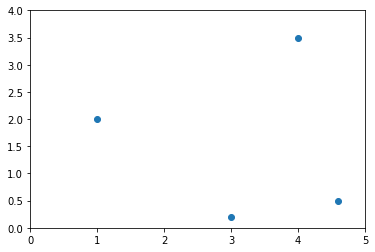

In [80]:
P = np.array([
        [3.0, 4.0, 1.0, 4.6],
        [0.2, 3.5, 2.0, 0.5],
    ])

x_coords_P, y_coords_P = P
plt.scatter(x_coords_P, y_coords_P)
plt.axis([0, 5, 0, 4])
plt.show()

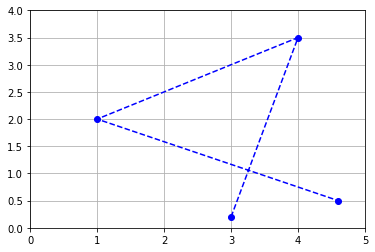

In [81]:
# since the vectors are ordered, we can see the matrix as a path and represent it with connected dots
plt.plot(x_coords_P, y_coords_P, "bo")
plt.plot(x_coords_P, y_coords_P, "b--")
plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

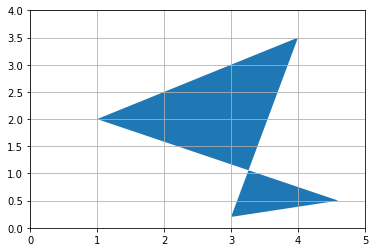

In [82]:
# we can represent it as a polygon
from matplotlib.patches import Polygon
plt.gca().add_artist(Polygon(P.T))
plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

## Geometric applications of matrix operations
- Vector addition results in a geometric translation
- Vector multiplication by a scalar results in rescaling
- Vector dot product results in projecting a vector onto another vector

### Addition = multiple geometric translation

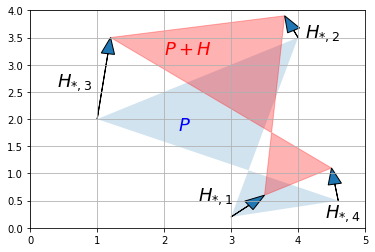

In [83]:
H = np.array([
        [0.5, -0.2, 0.2, -0.1],
        [0.4,  0.4, 1.5,  0.6],
    ])
P_moved = P + H

plt.gca().add_artist(Polygon(P.T, alpha=0.2))
plt.gca().add_artist(Polygon(P_moved.T, alpha=0.3, color="r"))
for vector, origin in zip(H.T, P.T):
    plot_vector2d(vector, origin=origin)
    
plt.text(2.2, 1.8, "$P$", color="b", fontsize=18)
plt.text(2.0, 3.2, "$P+H$", color="r", fontsize=18)
plt.text(2.5, 0.5, "$H_{*,1}$", color="k", fontsize=18)
plt.text(4.1, 3.5, "$H_{*,2}$", color="k", fontsize=18)
plt.text(0.4, 2.6, "$H_{*,3}$", color="k", fontsize=18)
plt.text(4.4, 0.2, "$H_{*,4}$", color="k", fontsize=18)

plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

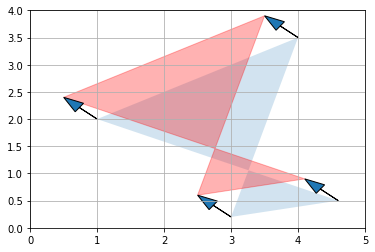

In [84]:
# if we add a matrix full of identical vectors, we get a simple geometric translation

H2 = np.array([
        [-0.5, -0.5, -0.5, -0.5],
        [ 0.4,  0.4,  0.4,  0.4],
    ])
P_translated = P + H2

plt.gca().add_artist(Polygon(P.T, alpha=0.2))
plt.gca().add_artist(Polygon(P_translated.T, alpha=0.3, color="r"))
for vector, origin in zip(H2.T, P.T):
    plot_vector2d(vector, origin=origin)

plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

Although matrics can only be added together if they have the same size, NumPy allows adding a row vector or a column vector to a matrix: this is called ***broadcating***.

In [85]:
P

array([[3. , 4. , 1. , 4.6],
       [0.2, 3.5, 2. , 0.5]])

In [86]:
P + [[-0.5], [0.4]]

array([[2.5, 3.5, 0.5, 4.1],
       [0.6, 3.9, 2.4, 0.9]])

### Scalar Multiplication

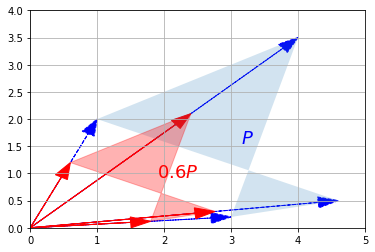

In [87]:
def plot_transformation(P_before, P_after, text_before, text_after, axis = [0, 5, 0, 4], arrows=False):
    if arrows:
        for vector_before, vector_after in zip(P_before.T, P_after.T):
            plot_vector2d(vector_before, color="blue", linestyle="--")
            plot_vector2d(vector_after, color="red", linestyle="-")
    plt.gca().add_artist(Polygon(P_before.T, alpha=0.2))
    plt.gca().add_artist(Polygon(P_after.T, alpha=0.3, color="r"))
    plt.text(P_before[0].mean(), P_before[1].mean(), text_before, fontsize=18, color="blue")
    plt.text(P_after[0].mean(), P_after[1].mean(), text_after, fontsize=18, color="red")
    plt.axis(axis)
    plt.grid()
    
P_rescaled = 0.60 * P
plot_transformation(P, P_rescaled, "$P$", "$0.6 P$", arrows=True)
plt.show()

### Matrix multiplication - Projection onto an axis

In [88]:
# row vector array
U = np.array([[1, 0]])

In [89]:
# dot product U.P
U.dot(P)

array([[3. , 4. , 1. , 4.6]])

These are the horizontal coordinates of the vectors in $P$. In other words, we just projected $P$ onto the horizontal axis.

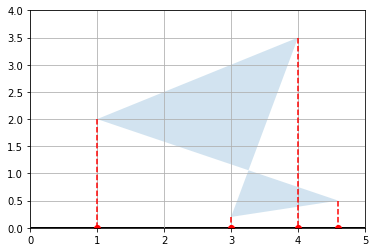

In [90]:
def plot_projection(U, P):
    U_P = U.dot(P)
    
    axis_end = 100 * U
    plot_vector2d(axis_end[0], color="black")

    plt.gca().add_artist(Polygon(P.T, alpha=0.2))
    for vector, proj_coordinate in zip(P.T, U_P.T):
        proj_point = proj_coordinate * U
        plt.plot(proj_point[0][0], proj_point[0][1], "ro")
        plt.plot([vector[0], proj_point[0][0]], [vector[1], proj_point[0][1]], "r--")

    plt.axis([0, 5, 0, 4])
    plt.grid()
    plt.show()

plot_projection(U, P)

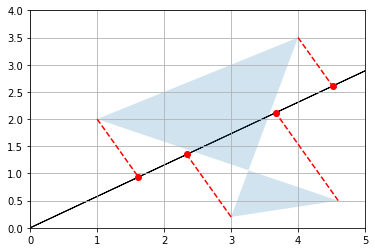

In [91]:
# project on the axis that is at a 30 degree angle above the horizontal axis
angle30 = 30 * np.pi / 180    # angle in radians
U_30 = np.array([[np.cos(angle30), np.sin(angle30)]])

plot_projection(U_30, P)

### Matrix multiplication - Rotation
Now let's create a $2 \times 2$ matrix $V$ containing two unit vectors that make 30° and 120° angles with the horizontal axis:

$V = \begin{bmatrix} \cos(30°) & \sin(30°) \\ \cos(120°) & \sin(120°) \end{bmatrix}$

In [92]:
angle120 = 120 * np.pi / 180
V = np.array([
        [np.cos(angle30), np.sin(angle30)],
        [np.cos(angle120), np.sin(angle120)],
    ])
V

# Matrix V is called a rotation matrix

array([[ 0.8660254,  0.5      ],
       [-0.5      ,  0.8660254]])

In [93]:
# dot product V.P
V.dot(P)

array([[ 2.69807621,  5.21410162,  1.8660254 ,  4.23371686],
       [-1.32679492,  1.03108891,  1.23205081, -1.8669873 ]])

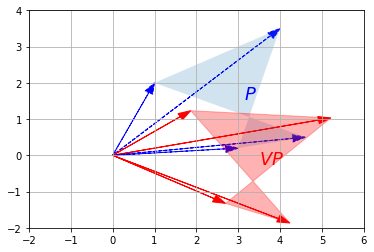

In [94]:
# let's plot P after rotated
P_rotated = V.dot(P)
plot_transformation(P, P_rotated, "$P$", "$VP$", [-2, 6, -2, 4], arrows=True)
plt.show()

### Matrix multiplication - other linear transformations

More generally, any linear transformation $f$ that maps n-dimensional vectors to m-dimensional vectors can be represented as an $m \times n$ matrix. For example, say $\textbf{u}$ is a 3-dimensional vector:

$\textbf{u} = \begin{pmatrix} x \\ y \\ z \end{pmatrix}$

and $f$ is defined as:

$f(\textbf{u}) = \begin{pmatrix}
ax + by + cz \\
dx + ey + fz
\end{pmatrix}$

This transormation $f$ maps 3-dimensional vectors to 2-dimensional vectors in a linear way (ie. the resulting coordinates only involve sums of multiples of the original coordinates). We can represent this transformation as matrix $F$:

$F = \begin{bmatrix}
a & b & c \\
d & e & f
\end{bmatrix}$

Now, to compute $f(\textbf{u})$ we can simply do a matrix multiplication:

$f(\textbf{u}) = F \textbf{u}$

If we have a matric $G = \begin{bmatrix}\textbf{u}_1 & \textbf{u}_2 & \cdots & \textbf{u}_q \end{bmatrix}$, where each $\textbf{u}_i$ is a 3-dimensional column vector, then $FG$ results in the linear transformation of all vectors $\textbf{u}_i$ as defined by the matrix $F$:

$FG = \begin{bmatrix}f(\textbf{u}_1) & f(\textbf{u}_2) & \cdots & f(\textbf{u}_q) \end{bmatrix}$

To summarize, the matrix on the left hand side of a dot product specifies what linear transormation to apply to the right hand side vectors. We have already shown that this can be used to perform projections and rotations, but any other linear transformation is possible. For example, here is a transformation known as a *shear mapping*:

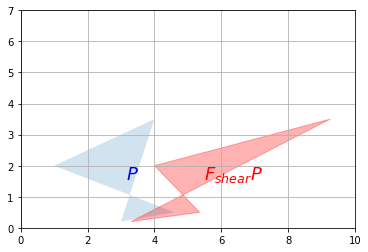

In [95]:
F_shear = np.array([
        [1, 1.5],
        [0, 1],
    ])
plot_transformation(P, F_shear.dot(P), "$P$", "$F_{shear} P$",
                    axis=[0, 10, 0, 7])
plt.show()

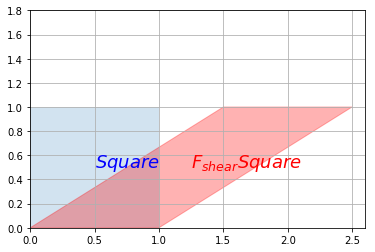

In [96]:
# unit square
Square = np.array([
        [0, 0, 1, 1],
        [0, 1, 1, 0]
    ])
plot_transformation(Square, F_shear.dot(Square), "$Square$", "$F_{shear} Square$",
                    axis=[0, 2.6, 0, 1.8])
plt.show()

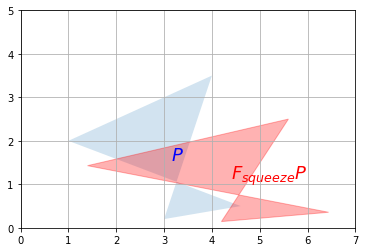

In [97]:
# squeeze mapping
F_squeeze = np.array([
        [1.4, 0],
        [0, 1/1.4]
    ])
plot_transformation(P, F_squeeze.dot(P), "$P$", "$F_{squeeze} P$",
                    axis=[0, 7, 0, 5])
plt.show()

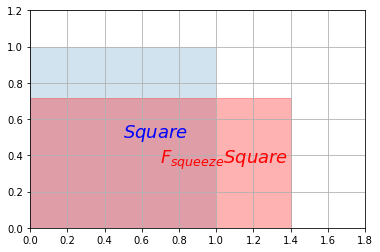

In [98]:
# squeeze effect on the unit square
plot_transformation(Square, F_squeeze.dot(Square), "$Square$", "$F_{squeeze} Square$",
                    axis=[0, 1.8, 0, 1.2])
plt.show()

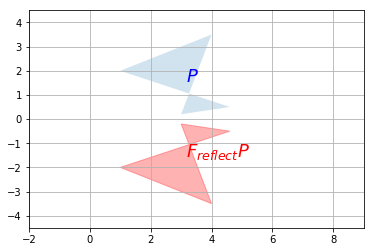

In [99]:
# reflection through the horizontal axis

F_reflect = np.array([
        [1, 0],
        [0, -1]
    ])
plot_transformation(P, F_reflect.dot(P), "$P$", "$F_{reflect} P$",
                    axis=[-2, 9, -4.5, 4.5])
plt.show()

## Matrix inverse

Can we find a transformation matrix that reverses the effect of a given transformation matrix $F$?
- It's possible with **inverse**, so the inverse of $F$ is noted $F^{-1}$.

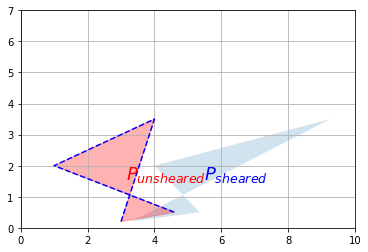

In [100]:
# demonstrate on the shear mapping

F_inv_shear = np.array([
    [1, -1.5],
    [0, 1]
])
P_sheared = F_shear.dot(P)
P_unsheared = F_inv_shear.dot(P_sheared)
plot_transformation(P_sheared, P_unsheared, "$P_{sheared}$", "$P_{unsheared}$",
                    axis=[0, 10, 0, 7])
plt.plot(P[0], P[1], "b--")
plt.show()

In [101]:
# NumPy provides an inv function to compute a matrix's inverse
F_inv_shear = LA.inv(F_shear)
F_inv_shear

array([[ 1. , -1.5],
       [ 0. ,  1. ]])

**Only square metrics can be inversed!**

For example, if we have a transformation that reduces the number of dimensions, the some information is lost and there is no way that we can get it back.

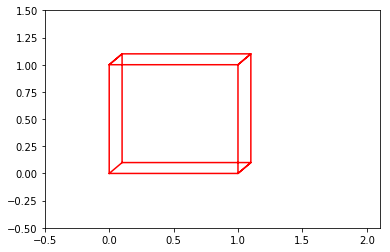

In [102]:
plt.plot([0, 0, 1, 1, 0, 0.1, 0.1, 0, 0.1, 1.1, 1.0, 1.1, 1.1, 1.0, 1.1, 0.1],
         [0, 1, 1, 0, 0, 0.1, 1.1, 1.0, 1.1, 1.1, 1.0, 1.1, 0.1, 0, 0.1, 0.1],
         "r-")
plt.axis([-0.5, 2.1, -0.5, 1.5])
plt.show()

**Even square transformation matrices can lose information!**

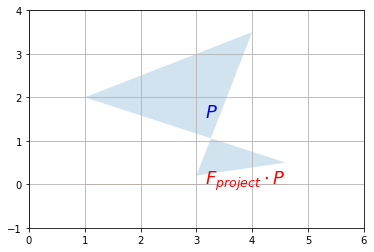

In [103]:
F_project = np.array([
        [1, 0],
        [0, 0]
    ])
plot_transformation(P, F_project.dot(P), "$P$", "$F_{project} \cdot P$",
                    axis=[0, 6, -1, 4])
plt.show()

This transformation matrix performs a projection onto the horizontal axis. Our polygon gets entirely flattened out so some information is entirely lost and it is impossible to go back to the original polygon using a linear transformation. 

In other words, $F_{project}$ has no inverse. Such a square matrix that cannot be inversed is called a **singular matrix** (aka degenerate matrix).

In [104]:
# in NumPy, it raises an exception
try:
    LA.inv(F_project)
except LA.LinAlgError as e:
    print("LinAlgError:", e)

LinAlgError: Singular matrix


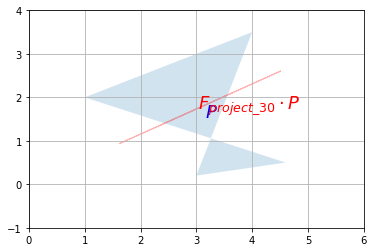

In [105]:
# another singular matrix, with projection onto the axis at a 30 degree angle above the horizontal axis
angle30 = 30 * np.pi / 180
F_project_30 = np.array([
               [np.cos(angle30)**2, np.sin(2*angle30)/2],
               [np.sin(2*angle30)/2, np.sin(angle30)**2]
         ])
plot_transformation(P, F_project_30.dot(P), "$P$", "$F_{project\_30} \cdot P$",
                    axis=[0, 6, -1, 4])
plt.show()

In [106]:
# NumPy manages to calculate an inverse, due to floating point rounding errors
LA.inv(F_project_30)

array([[ 1.54810441e+16, -2.68139549e+16],
       [-2.68139549e+16,  4.64431323e+16]])

The dot product of a matrix by its inverse results in the identity matrix:

$M \cdot M^{-1} = M^{-1} \cdot M = I$

**This make sense since doing a linear transformation followed by the inverse transformation results in no change at all**

In [107]:
F_shear.dot(LA.inv(F_shear))

array([[1., 0.],
       [0., 1.]])

Another way to express this is that the inverse of the inverse of a matrix $M$ is $M$ itself:

$((M)^{-1})^{-1} = M$

In [108]:
LA.inv(LA.inv(F_shear))

array([[1. , 1.5],
       [0. , 1. ]])

Also, the inverse of scaling by a factor of $\lambda$ is of course scaling by a factor or $\frac{1}{\lambda}$:

$ (\lambda \times M)^{-1} = \frac{1}{\lambda} \times M^{-1}$

A matrix that is its own inverse is called an **involution**.

The simplest examples are reflection matrices, or a rotation by 180°, but there are also more complex involutions, for example imagine a transformation that squeezes horizontally, then reflects over the vertical axis and finally rotates by 90° clockwise. Pick up a napkin and try doing that twice: you will end up in the original position. Here is the corresponding involutory matrix:

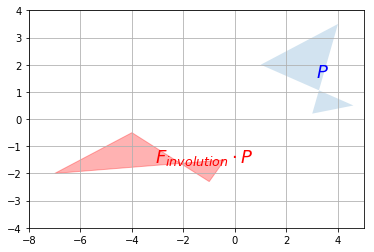

In [109]:
F_involution  = np.array([
        [0, -2],
        [-1/2, 0]
    ])
plot_transformation(P, F_involution.dot(P), "$P$", "$F_{involution} \cdot P$",
                    axis=[-8, 5, -4, 4])
plt.show()

Finally, a square matrix $H$ whose inverse is its own transpose is an **orthogonal matrix**:

$H^{-1} = H^T$

Therefore:

$H \cdot H^T = H^T \cdot H = I$

It corresponds to a transformation that preserves distances, such as rotations and reflections, and combinations of these, but not rescaling, shearing or squeezing. Let's check that $F_{reflect}$ is indeed orthogonal:

In [110]:
# inverse
LA.inv(F_reflect)

array([[ 1.,  0.],
       [-0., -1.]])

In [111]:
# transpose
F_reflect.T

array([[ 1,  0],
       [ 0, -1]])

In [112]:
# orthogonal matrix, since inverse = tranpose
# and the result of dot product is identity matrix

F_reflect.dot(F_reflect.T)

array([[1, 0],
       [0, 1]])

# Determinant

The determinant of a square matrix $M$, noted $\det(M)$ or $\det M$ or $|M|$ is a value that can be calculated from its elements $(M_{i,j})$ using various equivalent methods. One of the simplest methods is this recursive approach:

$|M| = M_{1,1}\times|M^{(1,1)}| - M_{2,1}\times|M^{(2,1)}| + M_{3,1}\times|M^{(3,1)}| - M_{4,1}\times|M^{(4,1)}| + \cdots ± M_{n,1}\times|M^{(n,1)}|$

Where $M^{(i,j)}$ is the matrix $M$ without row $i$ and column $j$.
For example, let's calculate the determinant of the following $3 \times 3$ matrix:

$M = \begin{bmatrix}
  1 & 2 & 3 \\
  4 & 5 & 6 \\
  7 & 8 & 0
\end{bmatrix}$

Using the method above, we get:

$|M| = 1 \times \left |\begin{bmatrix} 5 & 6 \\ 8 & 0 \end{bmatrix} \right |
      - 2 \times \left | \begin{bmatrix} 4 & 6 \\ 7 & 0 \end{bmatrix} \right |
      + 3 \times \left | \begin{bmatrix} 4 & 5 \\ 7 & 8 \end{bmatrix} \right |$

Now we need to compute the determinant of each of these $2 \times 2$ matrices (these determinants are called minors):

$\left | \begin{bmatrix} 5 & 6 \\ 8 & 0 \end{bmatrix} \right | = 5 \times 0 - 6 \times 8 = -48$

$\left | \begin{bmatrix} 4 & 6 \\ 7 & 0 \end{bmatrix} \right | = 4 \times 0 - 6 \times 7 = -42$

$\left | \begin{bmatrix} 4 & 5 \\ 7 & 8 \end{bmatrix} \right | = 4 \times 8 - 5 \times 7 = -3$

Now we can calculate the final result:

$|M| = 1 \times (-48) - 2 \times (-42) + 3 \times (-3) = 27$

In [113]:
# we can use NumPy's det function in the numpy.linalg
M = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 0],
    ])
LA.det(M)

27.0

One of the main uses of the determinant is to **determine whether a square matrix can be inversed or not: if the determinant is equal to 0, then the matrix cannot be inversed (it is a singular matrix), and if the determinant is not 0, then it can be inversed**.

For example, let's compute the determinant for the $F_{project}$, $F_{project\_30}$ and $F_{shear}$ matrices that we defined earlier

In [114]:
# F_project is singular, determinant = 0
LA.det(F_project)

0.0

In [115]:
# F_project_30 is actually singular
# the determinant is close to 0, it should be 0, but it's not due to tiny floating point errors
LA.det(F_project_30)

1.6148781609251353e-17

In [116]:
# F_shear can be inversed
LA.det(F_shear)

1.0

The determinant can also be used to measure how much a linear transformation affects surface areas: 

For example, the projection matrices $F_{project}$ and $F_{project\_30}$ completely flatten the polygon $P$, until its area is zero. This is why the determinant of these matrices is 0. The shear mapping modified the shape of the polygon, but it did not affect its surface area, which is why the determinant is 1. 

You can try computing the determinant of a rotation matrix, and you should also find 1. What about a scaling matrix? Let's see:

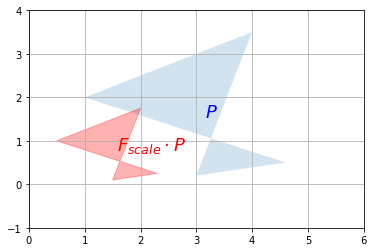

In [117]:
F_scale = np.array([
        [0.5, 0],
        [0, 0.5]
    ])
plot_transformation(P, F_scale.dot(P), "$P$", "$F_{scale} \cdot P$",
                    axis=[0, 6, -1, 4])
plt.show()

We rescaled the polygon by a factor of 1/2 on both vertical and horizontal axes so the surface area of the resulting polygon is 1/4$^{th}$ of the original polygon. Let's compute the determinant and check that:

In [118]:
# it can be inversed
LA.det(F_scale)

0.25

The determinant can actually be negative, when the transformation results in a "flipped over" version of the original polygon (eg. a left hand glove becomes a right hand glove). For example, the determinant of the <code>F_reflect matrix</code> is -1 because the surface area is preserved but the polygon gets flipped over:

In [119]:
LA.det(F_reflect)

-1.0

# Composing linear transformations
Several linear transformations can be chained simply by performing multiple dot products in a row. For example, to perform a squeeze mapping followed by a shear mapping, just write:

In [120]:
P_squeezed_then_sheared = F_shear.dot(F_squeeze.dot(P))
P_squeezed_then_sheared

array([[4.41428571, 9.35      , 3.54285714, 6.97571429],
       [0.14285714, 2.5       , 1.42857143, 0.35714286]])

In [121]:
# Since the dot product is associative, the following code is equivalent:
P_squeezed_then_sheared = (F_shear.dot(F_squeeze)).dot(P)
P_squeezed_then_sheared

array([[4.41428571, 9.35      , 3.54285714, 6.97571429],
       [0.14285714, 2.5       , 1.42857143, 0.35714286]])

**Note**: the order of the transformations is the reverse of the dot product order.

If we are going to perform this composition of linear transformations more than once, we might as well save the composition matrix like this:

In [122]:
# we can perform both transformations in just one dot product, which can lead to a very significant performance boost
F_squeeze_then_shear = F_shear.dot(F_squeeze)
P_squeezed_then_sheared = F_squeeze_then_shear.dot(P)
P_squeezed_then_sheared

array([[4.41428571, 9.35      , 3.54285714, 6.97571429],
       [0.14285714, 2.5       , 1.42857143, 0.35714286]])

What if you want to perform the inverse of this double transformation? 

Well, if you **squeezed and then you sheared**, and you want to **undo** what you have done, it should be obvious that you should **unshear first and then unsqueeze**. In more mathematical terms, given two invertible (aka nonsingular) matrices $Q$ and $R$:

$(Q \cdot R)^{-1} = R^{-1} \cdot Q^{-1}$

In [123]:
# in NumPy
LA.inv(F_shear.dot(F_squeeze)) == LA.inv(F_squeeze).dot(LA.inv(F_shear))

array([[ True,  True],
       [ True,  True]])

# Singular Value Decomposition
It turns out that any $m \times n$ matrix $M$ can be decomposed into the dot product of three simple matrices:

- a rotation matrix $U$ (an $m \times m$ orthogonal matrix)
- a scaling & projecting matrix $\Sigma$ (an $m \times n$ diagonal matrix)
- and another rotation matrix $V^T$ (an $n \times n$ orthogonal matrix)

$M = U \cdot \Sigma \cdot V^{T}$

In [124]:
# decompose the shear transformation
U, Σ_diag, V_T = LA.svd(F_shear)
U

array([[ 0.89442719, -0.4472136 ],
       [ 0.4472136 ,  0.89442719]])

In [125]:
# Note: this is just a 1D array containing the diagonal value of Σ
Σ_diag

array([2. , 0.5])

In [126]:
# To get the actual matrix Σ, we can use NumPy's diag
Σ = np.diag(Σ_diag)
Σ

array([[2. , 0. ],
       [0. , 0.5]])

In [127]:
V_T

array([[ 0.4472136 ,  0.89442719],
       [-0.89442719,  0.4472136 ]])

Let's check that $U \cdot \Sigma \cdot V^T$ is indeed equal to F_shear:

In [128]:
U.dot(np.diag(Σ_diag)).dot(V_T)

array([[1. , 1.5],
       [0. , 1. ]])

In [129]:
F_shear

array([[1. , 1.5],
       [0. , 1. ]])

Let's apply these transformations one by one (in reverse order) on the unit square to understand what's gound on.

First, let's apply the first rotation $V^T$:

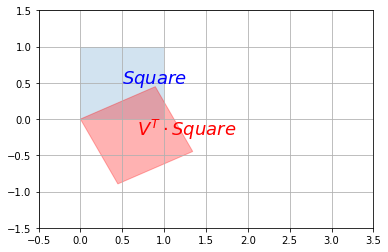

In [130]:
plot_transformation(Square, V_T.dot(Square), "$Square$", "$V^T \cdot Square$",
                    axis=[-0.5, 3.5, -1.5, 1.5])
plt.show()

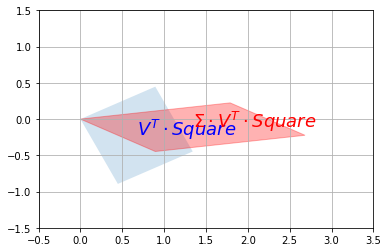

In [131]:
# Now let's rescale along the vertical and horizontal axes using Σ

plot_transformation(V_T.dot(Square), Σ.dot(V_T).dot(Square), "$V^T \cdot Square$", "$\Sigma \cdot V^T \cdot Square$",
                    axis=[-0.5, 3.5, -1.5, 1.5])
plt.show()

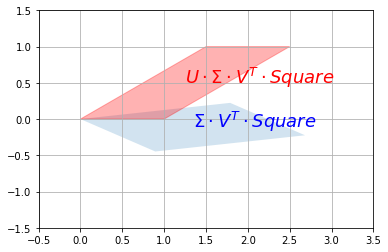

In [132]:
# Finally, apply the second rotation U
plot_transformation(Σ.dot(V_T).dot(Square), U.dot(Σ).dot(V_T).dot(Square),"$\Sigma \cdot V^T \cdot Square$", "$U \cdot \Sigma \cdot V^T \cdot Square$",
                    axis=[-0.5, 3.5, -1.5, 1.5])
plt.show()

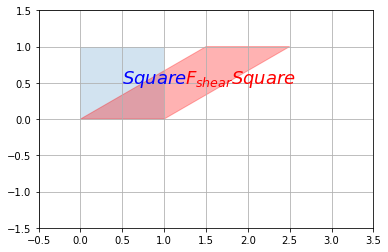

In [133]:
# Original F_shear Square
plot_transformation(Square, F_shear.dot(Square), "$Square$", "$F_{shear} Square$",
                    axis=[-0.5, 3.5, -1.5, 1.5])
plt.show()

# Eigenvectors and eigenvalues

An **eigenvector** of a square matrix $M$ (also called a **characteristic vector**) is a non-zero vector that remains on the same line after transformation by the linear transformation associated with $M$. A more formal definition is any vector $v$ such that:

$M \cdot v = \lambda \times v$

Where $\lambda$ is a scalar value called the **eigenvalue** associated to the vector $v$.

For example, any horizontal vector remains horizontal after applying the shear mapping (as you can see on the image above), so it is an eigenvector of $M$. A vertical vector ends up tilted to the right, so vertical vectors are *NOT* eigenvectors of $M$.

If we look at the squeeze mapping, we find that any horizontal or vertical vector keeps its direction (although its length changes), so all horizontal and vertical vectors are eigenvectors of $F_{squeeze}$.

However, rotation matrices have no eigenvectors at all (except if the rotation angle is 0° or 180°, in which case all non-zero vectors are eigenvectors).

In [134]:
# NumPy's eig function
eigenvalues, eigenvectors = LA.eig(F_squeeze)
eigenvalues

array([1.4       , 0.71428571])

In [135]:
eigenvectors

array([[1., 0.],
       [0., 1.]])

Indeed the horizontal vectors are stretched by a factor of 1.4, and the vertical vectors are shrunk by a factor of 1/1.4=0.714

In [136]:
# F_shear
eigenvalues2, eigenvectors2 = LA.eig(F_shear)
eigenvalues2

array([1., 1.])

In [137]:
eigenvectors2

array([[ 1.00000000e+00, -1.00000000e+00],
       [ 0.00000000e+00,  1.48029737e-16]])

Wait, what!? We expected just one unit eigenvector, not two. The second vector is almost equal to $\begin{pmatrix}-1 \\ 0 \end{pmatrix}$, which is on the same line as the first vector $\begin{pmatrix}1 \\ 0 \end{pmatrix}$. This is due to floating point errors. We can safely ignore vectors that are (almost) colinear (ie. on the same line).

# Trace
The trace of a square matrix $M$, noted $tr(M)$ is the sum of the values on its main diagonal. For example:

In [138]:
D = np.array([
        [100, 200, 300],
        [ 10,  20,  30],
        [  1,   2,   3],
    ])
np.trace(D)

123

In [139]:
F_project

array([[1, 0],
       [0, 0]])

The trace does not have a simple geometric interpretation (in general), but it has a number of properties that make it useful in many areas:

- $tr(A + B) = tr(A) + tr(B)$
- $tr(A \cdot B) = tr(B \cdot A)$
- $tr(A \cdot B \cdot \cdots \cdot Y \cdot Z) = tr(Z \cdot A \cdot B \cdot \cdots \cdot Y)$
- $tr(A^T \cdot B) = tr(A \cdot B^T) = tr(B^T \cdot A) = tr(B \cdot A^T) = \sum_{i,j}X_{i,j} \times Y_{i,j}$
- …

It does, however, have a useful geometric interpretation in the case of projection matrices (such as $F_{project}$ that we discussed earlier): it corresponds to the number of dimensions after projection. For example:

In [140]:
np.trace(F_project)

1